In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
df_03_17=pd.read_csv('/content/2003_2017_waste.csv')
df_18_20=pd.read_csv('/content/2018_2020_waste.csv')
df_we=pd.read_csv('/content/waste_energy_stat.csv')


df_we


,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4100 kWh
4,crude_oil saved,16 barrels,0.12 barrels,1.8 barrels,40 barrels,11 barrels


In [ ]:
#data cleaning 

df_18_20 = df_18_20.rename(columns={'Waste Type':'waste_type', "Total Generated ('000 tonnes)":'total_waste_generated_tonne',
                              "Total Recycled ('000 tonnes)":'total_waste_recycled_tonne','Year':'year'})

#correction of two wrong values 
df_18_20.iloc[19,1]=744
df_18_20.iloc[1,2]=1260


In [ ]:
# equalizing value, creation of the recycling rate for 17_20 and data merging 
df_18_20['total_waste_generated_tonne']=df_18_20['total_waste_generated_tonne']*1000
df_18_20['total_waste_recycled_tonne']=df_18_20['total_waste_recycled_tonne']*1000
df_18_20['recycling_rate']=df_18_20['total_waste_recycled_tonne']/df_18_20['total_waste_generated_tonne']

In [ ]:
# recycling rate > 2 decimals 
df_18_20['recycling_rate']=df_18_20['recycling_rate'].round(2)

In [ ]:
df_18_20 = df_18_20.reindex(columns=['waste_type','total_waste_recycled_tonne','total_waste_generated_tonne','recycling_rate','year'])

In [ ]:
df_03_17=df_03_17.drop('waste_disposed_of_tonne',axis=1)


In [ ]:
df=pd.concat([df_03_17, df_18_20])

In [ ]:
#all the unique name to be replaced 
df['waste_type'].unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)', 'Total',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)',
       'Construction& Demolition', 'Horticultural', 'Non-Ferrous Metal',
       'Others (stones, ceramic, rubber, ect)', 'Overall',
       'Construction & Demolition', 'Ash & sludge',
       'Others (stones, ceramics, etc.)'], dtype=object)

In [ ]:
#number of data per unique name - should be 18 for each columns / all <18 name to be replaced
df['waste_type']=df['waste_type'].str.lower()
df['waste_type'].value_counts()


paper/cardboard                            18
textile/leather                            18
scrap tyres                                18
glass                                      18
used slag                                  18
plastics                                   17
total                                      15
horticultural waste                        15
ferrous metal                              14
others (stones, ceramics & rubber etc)     12
construction debris                        12
non-ferrous metals                         12
sludge                                     11
food waste                                 11
wood/timber                                11
food                                        7
wood                                        7
ash & sludge                                6
non-ferrous metal                           6
ferrous metals                              4
c&d                                         3
overall                           

We got now, one dataframe. Let's now vizalize the data. 

In [ ]:
df=df.replace('plastic','plastics') 
df=df.replace('overall','total')
df=df.replace('horticultural','horticultural waste')
df=df.replace('ferrous metal','ferrous metals')
df=df.replace('non-ferrous metal','non-ferrous metals')
df=df.replace(['construction& demolition','construction & demolition','c&d'],'construction debris')
df=df.replace(['others (stones, ceramic, rubber, ect)','others (stones, ceramics, etc.)','others',
               'others (stones, ceramic, rubber, etc.)','others (stones, ceramics & rubber etc.)'],'others (stones, ceramics & rubber etc)')
df=df.replace('food waste','food')
df=df.replace('wood','wood/timber')
df=df.replace(['ash & sludge','sludge'],'ash and sludge')

df.to_csv('SingaporeWasteManagement.csv', index=False)


In [ ]:
df_total=df[df['waste_type']=='total']
df_total= df_total.sort_values('year')
df_total.head()


,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
209,total,2223200.0,4728200,0.47,2003
194,total,2307100.0,4789700,0.48,2004
179,total,2469400.0,5018200,0.49,2005
164,total,2656900.0,5220500,0.51,2006
149,total,3034800.0,5600800,0.54,2007


Vizualization style Time Series of 'total waste generated', 'total recycle generated' and 'recycling rate'

In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_generated_tonne'],
        name='Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_recycled_tonne'],
        name='Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_total['year'],
        y=df_total['recycling_rate'],
        name='Recycling Rate',
    ),
    secondary_y=True
)

fig.show()


fig.write_html("/content/map.html", include_plotlyjs = 'cdn')


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Vizualization style Pie Chart of waste generated by type of waste 


In [ ]:
#based on the third datset - calculation of the energy saved for each type of waste 
df_energy_save=df[df['waste_type'].isin(['plastics','glass','ferrous metals','non-ferrous metals','paper/cardboard'])]
def energy_save(ex):
    if ex=='paper/cardboard':
        return 4100
    elif ex=='plastics':
        return 5774
    elif ex=='ferrous metals':
        return 642
    elif ex=='non-ferrous metals':
        return 14000
    else:
        return 42

def oil_saving(ex):
    if ex=='paper/cardboard':
        return 11*159
    elif ex=='plastics':
        return 16*159
    elif ex=='ferrous metals':
        return 1.8*159
    elif ex=='non-ferrous metals':
        return 40*159
    else:
        return 0.12*159

df_energy_save['energy_saving']=df_energy_save['waste_type'].apply(energy_save)
df_energy_save['oil_saving']=df_energy_save['waste_type'].apply(oil_saving)
df_energy_save['energy_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['energy_saving']
df_energy_save['oil_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['oil_saving']

df_energy_save.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,energy_saving,oil_saving,energy_saving_amount,oil_saving_amount
1,paper/cardboard,607100.0,1183100,0.51,2016,4100,1749.00,2.489110e+09,1.061818e+09
2,plastics,59500.0,822200,0.07,2016,5774,2544.00,3.435530e+08,1.513680e+08
6,ferrous metals,1351500.0,1357500,0.99,2016,642,286.20,8.676630e+08,3.867993e+08
7,non-ferrous metals,95900.0,97200,0.99,2016,14000,6360.00,1.342600e+09,6.099240e+08
10,glass,14700.0,72300,0.20,2016,42,19.08,6.174000e+05,2.804760e+05


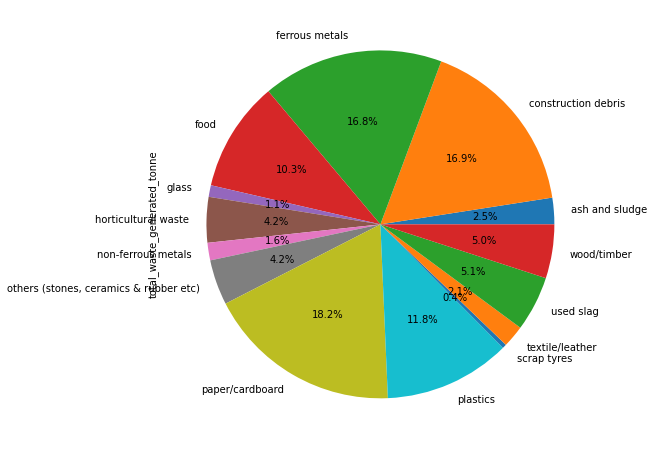

In [ ]:
df1=df[df['waste_type'] != 'total']
df1.groupby('waste_type')['total_waste_generated_tonne'].sum().plot.pie(figsize=(8,8),autopct='%1.1f%%')

Vizualization style Time Series of energie and oil saved by waste type

In [ ]:
fig = px.bar(df_energy_save, x="year", y="energy_saving_amount", color="waste_type", title="energy_saving_amount")
fig.show()


In [ ]:
fig = px.bar(df_energy_save, x="year", y="oil_saving_amount", color="waste_type", title="oil_saving_amount")
fig.show()

In [ ]:
# we can observe larger impacts from paper/cardboard and non-ferrous metal on the energy saved because their amount of energy saved in kWh and barrels by recycling one metric tonne are large. 
# For non-ferrous metal: 14000 Kwh and 40 barrels 
# For paper-cardboard: 4100 Kwh and 11 barrels 


Vizalization of all the recycling rates for all the different materials

In [ ]:
df_metal=df[df['waste_type']=='ferrous metals'].sort_values('year')
df_const=df[df['waste_type']=='construction debris'].sort_values('year')
df_food=df[df['waste_type']=='food'].sort_values('year')
df_paper=df[df['waste_type']=='paper/cardboard'].sort_values('year')
df_plastic=df[df['waste_type']=='plastics'].sort_values('year')
df_nometal=df[df['waste_type']=='non-ferrous metals'].sort_values('year')
df_glass=df[df['waste_type']=='glass'].sort_values('year')

In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_generated_tonne'],
        name='Metal Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_recycled_tonne'],
        name='Metal Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_metal['year'],
        y=df_metal['recycling_rate'],
        name='Metal Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_generated_tonne'],
        name='Construction Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_recycled_tonne'],
        name='Construction Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_const['year'],
        y=df_const['recycling_rate'],
        name='Construction Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_generated_tonne'],
        name='Food Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_recycled_tonne'],
        name='Food Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_food['year'],
        y=df_food['recycling_rate'],
        name='Food Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_generated_tonne'],
        name='Paper Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_recycled_tonne'],
        name='Paper Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_paper['year'],
        y=df_paper['recycling_rate'],
        name='Paper Recycling Rate',
    ),
    secondary_y=True
)

fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_generated_tonne'],
        name='Plastic Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_recycled_tonne'],
        name='Plastic Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_plastic['year'],
        y=df_plastic['recycling_rate'],
        name='Plastic Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_generated_tonne'],
        name='Nonmetal Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_recycled_tonne'],
        name='Nonmetal Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_nometal['year'],
        y=df_nometal['recycling_rate'],
        name='Nonmetal Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_generated_tonne'],
        name='Glass Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_recycled_tonne'],
        name='Glass Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_glass['year'],
        y=df_glass['recycling_rate'],
        name='Glass Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




We can observe larger impacts from paper/cardboard and non-ferrous metal on the energy saved because their amount of energy saved in kWh and barrels by recycling one metric tonne are large. 

For non-ferrous metal: 14000 Kwh and 40 barrels 

For paper-cardboard: 4100 Kwh and 11 barrels 

Plastic has also one of the largest amount of energy saved in Kwh and crude oil in barrels by recycling one metric tonne per waste type. (5774 Kwh and 16 barrels for 1 metric tonne)
However its recycling rate is very low. One important action to improve waste management in Singapore would be to improve the technology to raise the recycling rate of plastic. 

Finally, food waste represents a large part of overall waste generated. Despite an increasing recycling rate, only 18% was recycled in 2020. We do not have any data about the energy saved be metric tonne for food waste, but if we can improve its recycle rate and understand data about energy save and crude oil saved by recycling food, we may be better improve waste management globally.


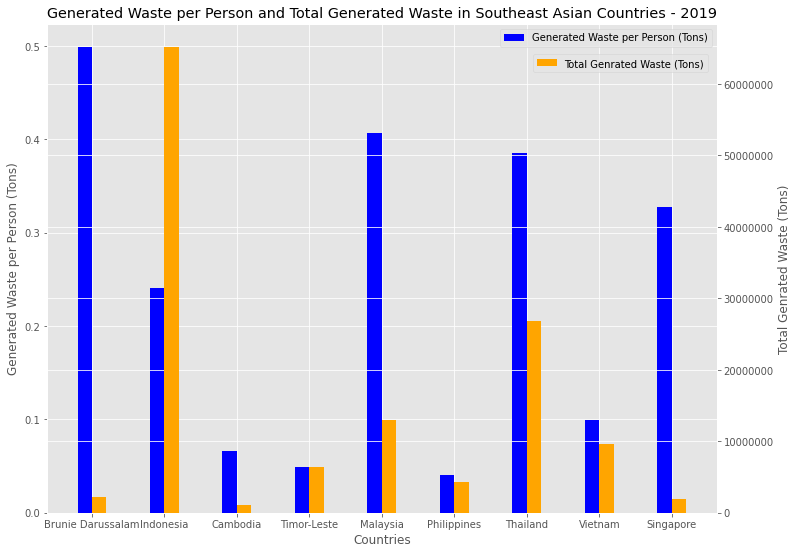

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 9) # (width, height)

x = ['Brunie Darussalam', 'Indonesia', 'Cambodia', 'Timor-Leste', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore']
y = [2162531.156, 65200000, 1089000, 6387500, 12982685, 4332222.32, 26853366, 9570300, 1870000]

x_pos = [i for i,_ in enumerate(x)]
x_axis = np.arange(len(x_pos))


y1 = [0.499088743030168, 0.240923281868178, 0.0660538759431783, 0.0493960725965669, 0.406346654626102, 0.0400699034093881, 0.385682463666874, 0.0992130526364415, 0.32786310400448837]

ax1 = plt.plot()
plt.bar(x_axis - 0.1, y1, 0.2, color='blue', label='Generated Waste per Person(Tons)')
plt.ylabel("Generated Waste per Person (Tons)")
plt.legend(['Generated Waste per Person (Tons)'])
plt.xlabel('Countries')

ax2 = plt.twinx()
ax2.bar(x_axis + 0.1, y, 0.2, color='orange', label='Total Generated Waste (Tons)')

plt.title('Generated Waste per Person and Total Generated Waste in Southeast Asian Countries - 2019')
plt.ylabel("Total Genrated Waste (Tons)")
plt.ticklabel_format(style='plain')
plt.xticks(x_pos, x)
plt.legend(['Total Genrated Waste (Tons)'], loc=(0.725, 0.9))


plt.show()

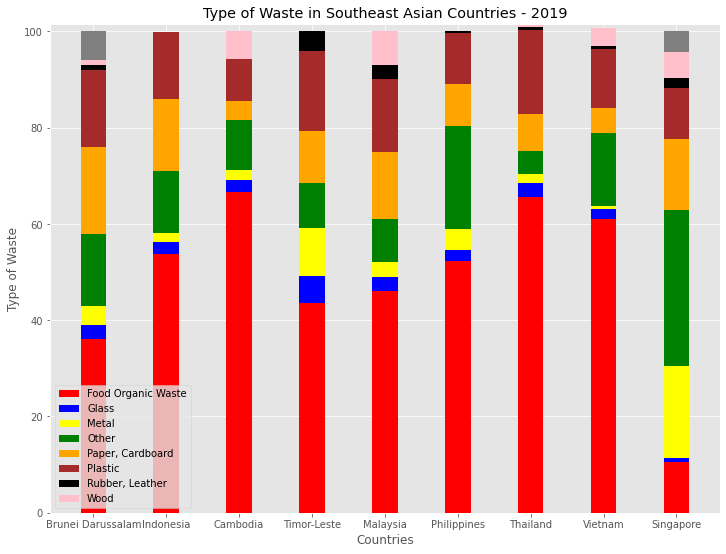

In [ ]:
# importing packages
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 9) # (width, height)

# create data
x = ['Brunei Darussalam', 'Indonesia', 'Cambodia', 'Timor-Leste', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore']
y1 = np.array([36, 53.8, 66.6, 43.6, 46, 52.31, 65.52, 61, 10.51])
y2 = np.array([3, 2.5, 2.6, 5.5, 3, 2.34, 3.04, 2.18, 0.93])
y3 = np.array([4, 1.8, 2, 10, 3, 4.22, 1.85, 0.58, 19.12])
y4 = np.array([15, 12.9, 10.4, 9.3, 9, 21.52, 4.74, 15.18, 32.3])
y5 = np.array([18, 14.9, 4, 10.9, 14, 8.7, 7.6, 5.2, 14.86])
y6 = np.array([16, 14, 8.6, 16.5, 15, 10.55, 17.59, 12.15, 10.58])
y7 = np.array([1, 0, 0, 4.2, 3, 0.37, 0.46, 0.6, 1.96])
y8 = np.array([1, 0, 5.8, 0, 7, 0, 0.8, 3.74, 5.5])
y9 = ([6, 0, 0, 0, 0, 0, 0, 0, 4.26])

# plot bars in stack manner
bar_width = 0.35
plt.bar(x, y1, width=bar_width, color='red')
plt.bar(x, y2, width=bar_width, bottom=y1, color='blue')
plt.bar(x, y3, width=bar_width, bottom=y1+y2, color='yellow')
plt.bar(x, y4, width=bar_width, bottom=y1+y2+y3, color='green')
plt.bar(x, y5, width=bar_width, bottom=y1+y2+y3+y4, color='orange')
plt.bar(x, y6, width=bar_width, bottom=y1+y2+y3+y4+y5, color='brown')
plt.bar(x, y7, width=bar_width, bottom=y1+y2+y3+y4+y5+y6, color='black')
plt.bar(x, y8, width=bar_width, bottom=y1+y2+y3+y4+y5+y6+y7, color='pink')
plt.bar(x, y9, width=bar_width, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color='grey')
plt.xlabel('Countries')
plt.ylabel('Type of Waste')
plt.legend(['Food Organic Waste', 'Glass', 'Metal', 'Other', 'Paper, Cardboard', 'Plastic', 'Rubber, Leather', 'Wood'])
plt.title('Type of Waste in Southeast Asian Countries - 2019')
plt.show()

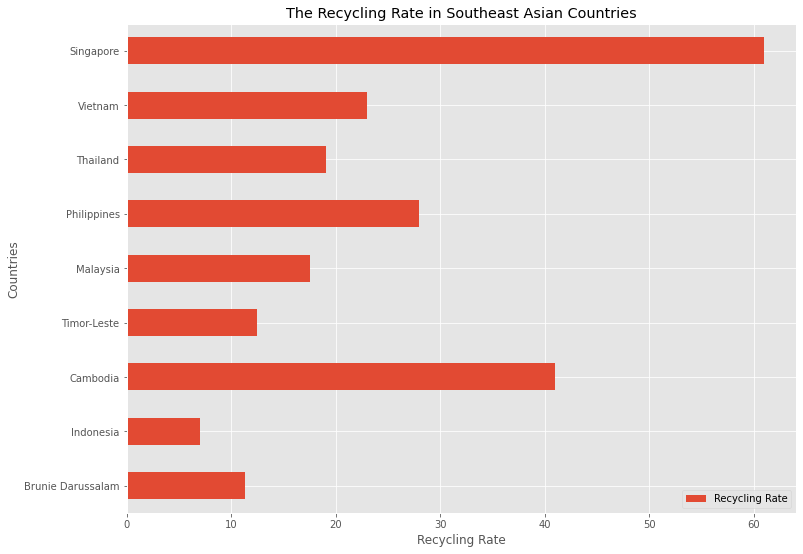

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
plt.rcParams["figure.figsize"] = (12, 9) 

data = {'Recycling Rate': [11.3, 7, 41, 12.5, 17.5, 28, 19.1, 23, 61]}

df = pd.DataFrame(data, columns=['Recycling Rate'],
                  index=['Brunie Darussalam', 'Indonesia', 'Cambodia', 'Timor-Leste', 'Malaysia', 'Philippines',
                         'Thailand', 'Vietnam', 'Singapore'])

df.plot.barh()

plt.title('The Recycling Rate in Southeast Asian Countries')
plt.ylabel('Countries')
plt.xlabel('Recycling Rate')
plt.show()

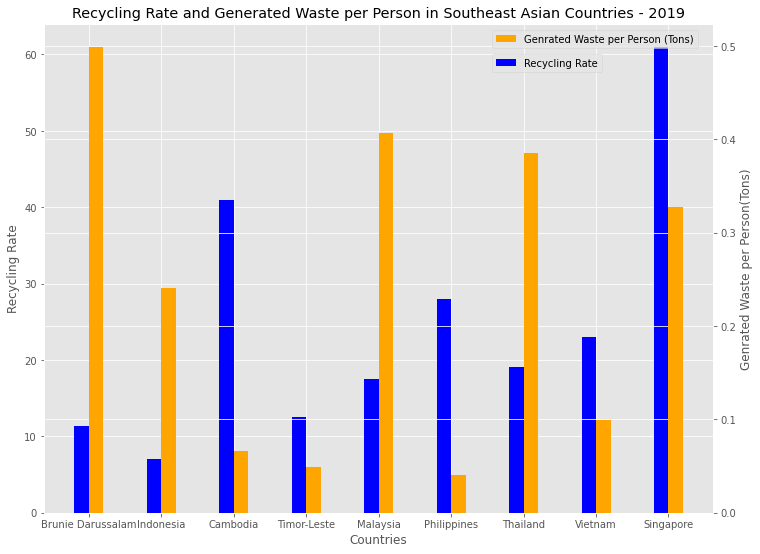

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 9) # (width, height)

x = ['Brunie Darussalam', 'Indonesia', 'Cambodia', 'Timor-Leste', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore']
y = [0.499088743030168, 0.240923281868178, 0.0660538759431783, 0.0493960725965669, 0.406346654626102, 0.0400699034093881, 0.385682463666874, 0.0992130526364415, 0.32786310400448837]

x_pos = [i for i,_ in enumerate(x)]
x_axis = np.arange(len(x_pos))


y1 = [11.3, 7, 41, 12.5, 17.5, 28, 19.1, 23, 61]



ax1 = plt.plot()
plt.bar(x_axis - 0.1, y1, 0.2, color='blue', label='Recycling Rate')
plt.ylabel("Recycling Rate")
plt.legend(['Recycling Rate'], loc=(0.67, 0.9))
plt.xlabel('Countries')

ax2 = plt.twinx()
ax2.bar(x_axis + 0.1, y, 0.2, color='orange', label='Total Generated Waste (Tons)')

plt.title('Recycling Rate and Generated Waste per Person in Southeast Asian Countries - 2019')
plt.ylabel("Genrated Waste per Person(Tons)")
plt.ticklabel_format(style='plain')
plt.xticks(x_pos, x)
plt.legend(['Genrated Waste per Person (Tons)'], loc=(0.67, 0.95))


plt.show()

# **The comparison of the countries' GDP, GDP per capita and population density**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
!mkdir data
!curl country_level_data_0.csv -o ./data/data.csv

In [ ]:
data_path = "./data/gdp-world-regions-stacked-area.csv"
data_path2 ="./data/population-density.csv"
data_path3 = "./data/gdp-per-capita-worldbank.csv"
data_path4 = './data/API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv'
dataframe = pandas.read_csv(data_path,index_col=0)
dataframe.head()

FileNotFoundError: ignored

In [ ]:
dataframe2 = pandas.read_csv(data_path2, index_col=0)
dataframe2.head()

In [ ]:
dataframe3 = pandas.read_csv(data_path3,index_col=0)
dataframe3.head()

In [ ]:
dataframe4 = pandas.read_csv(data_path4)
dataframe4.head()

In [ ]:
df=dataframe[dataframe['Year']==2018]
df

In [ ]:
df2=dataframe2[dataframe2['Year']==2018]
df2

In [ ]:
df3=dataframe3[dataframe3['Year']==2018]
df3

In [ ]:
GDP=df.loc[['Singapore','Indonesia', 'Cambodia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam'],:]
GDP

In [ ]:
Population_density=df2.loc[['Singapore','Indonesia', 'Cambodia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam'],:]
Population_density

In [ ]:
GDP_pc=df3.loc[['Singapore','Indonesia', 'Cambodia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam'],:]
GDP_pc

In [ ]:
!pip install plotly

from plotly.subplots import make_subplots

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = go.Figure()
fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=GDP.index, 
        y=GDP['GDP'],
        name="GDP"
        )
)
fig.update_yaxes(title_text="GDP (in 2011 inernational dollar)")

fig.add_trace(
    go.Line(
        x=GDP_pc.index, 
        y=GDP_pc['GDP per capita, PPP (constant 2017 international $)'],
        yaxis="y2",
        name="GDP per capita"
        )
)
fig.update_xaxes(title_text="countries")
fig.update_yaxes(title_text="GDP (in 2011 inernational dollar)",secondary_y=False)
fig.update_yaxes(title_text="GDP per capita (in 2017 internat dollar)",secondary_y=True)


NameError: ignored

In [ ]:
fig = go.Figure()
fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=Population_density.index, 
        y=Population_density['Population density (people per sq. km of land area)'],
        name="population density"
        )
)


fig.update_xaxes(title_text="countries")
fig.update_yaxes(title_text="	Population density (people per sq. km of land area)")

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
waste = []

Correlation between GDP sector and waste type

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import plotly.graph_objects as go
import pandas as pd

data= pd.read_csv("/content/Book1.csv")

fig = go.Figure(data=go.Scatter(x=data['% Agriculture'],
                                y=data['% Food waste'],
                                mode='markers',
                                marker_color=data['% Agriculture'],
                                text=data['Country'])) # hover text goes here
fig = px.scatter(data, x='% Agriculture', y='% Food waste', trendline="ols")
fig.update_layout(
    title='GDP from Agriculture vs Food Waste',
    xaxis_title = "Percentage of GDP from agriculture",
    yaxis_title= "Percentage of waste from food")

fig.show()

Waste production by region

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!mkdir data
data = pd.read_csv("/content/data/country_level_data_0.csv",index_col=2)
data

mkdir: cannot create directory ‘data’: File exists


,iso3c,region_id,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,LCN,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,103187,NaN,NaN,NaN,NaN,NaN,NaN,8.813202e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
Afghanistan,AFG,SAS,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,34656032,6802511.0,NaN,20000.0,NaN,NaN,9855.00,5.628525e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
Angola,AGO,SSF,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,13.500000,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,25096150,NaN,NaN,92000.0,NaN,NaN,5495.95,4.213644e+06,NaN,NaN,NaN,NaN,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,ECS,UMC,13724.058594,51.400000,4.500000,4.800000,15.210000,9.900000,9.600000,NaN,4.6,NaN,No,Yes,Yes,Yes,No,2854191,NaN,203009.0,20000.0,5714.82,270269.0,114.30,1.087447e+06,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
Andorra,AND,ECS,HIC,43711.800781,31.200000,8.200000,2.600000,11.600000,35.100000,11.300000,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,82431,NaN,NaN,NaN,1788.00,NaN,NaN,4.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,ECS,LMC,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,11.000000,NaN,7.0,NaN,Yes,Yes,Yes,Yes,NaN,1801800,3880.0,217241.0,23.0,495.00,NaN,834.00,3.190000e+05,NaN,NaN,35.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,66.43,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen,

In [ ]:
data[data['region_id'].str.contains('EAS')]

,iso3c,region_id,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,ASM,EAS,UMC,11113.442383,19.70,3.40,7.90,25.60,26.40,12.80,4.20,NaN,NaN,NaN,Yes,NaN,NaN,NaN,55599,NaN,NaN,NaN,NaN,NaN,NaN,1.898949e+04,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,AUS,EAS,HIC,47784.179688,48.44,3.81,19.38,3.46,17.30,7.61,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,23789338,NaN,2.000000e+07,574000.0,7000000.00,3.100000e+07,NaN,1.334500e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.77,48.87,NaN,NaN,42.10,NaN,NaN,NaN,NaN
Brunei Darussalam,BRN,EAS,HIC,60865.988281,36.00,3.00,4.00,15.00,18.00,16.00,1.00,1.00,6.00,NaN,Yes,Yes,Yes,Yes,423196,NaN,NaN,7700.0,NaN,NaN,195.00,2.162532e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,28.00,NaN,NaN
China,CHN,EAS,UMC,16092.300781,61.20,2.10,1.10,13.10,9.60,9.80,1.30,1.80,NaN,NaN,Yes,Yes,Yes,NaN,1400050048,4.000000e+09,1.500000e+09,7211000.0,34652400.00,3.270790e+09,NaN,3.950814e+08,NaN,NaN,20.0,NaN,NaN,NaN,94.00,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,29.84,60.16,8.21,NaN,NaN,NaN,NaN,NaN,At Generator level
Fiji,FJI,EAS,UMC,10787.685547,33.20,4.10,1.90,3.50,12.50,7.50,0.10,NaN,37.20,NaN,Yes,Yes,Yes,NaN,867086,NaN,NaN,4600.0,NaN,NaN,316.16,1.893896e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.00,NaN,NaN,5.45,NaN,42.55,NaN,Household waste collected
"Micronesia, Fed. Sts.",FSM,EAS,LMC,3440.064209,23.83,7.07,16.73,9.32,13.30,26.17,3.58,NaN,NaN,NaN,Yes,Yes,None,NaN,104937,NaN,NaN,200.0,NaN,NaN,73.47,2.603957e+04,NaN,NaN,NaN,NaN,NaN,NaN,8.00,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guam,GUM,EAS,HIC,59074.941406,27.30,4.60,9.00,8.70,28.50,12.40,3.10,6.40,NaN,NaN,Yes,Yes,Yes,Yes,159973,NaN,NaN,NaN,NaN,NaN,NaN,1.415000e+05,NaN,NaN,100.0,NaN,NaN,NaN,100.00,NaN,NaN,NaN,10

In [ ]:
data1 = data.loc[['Brunei Darussalam','Indonesia', 'Cambodia', 'Timor-Leste', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam','Singapore'],:]
data1

,iso3c,region_id,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,BRN,EAS,HIC,60865.988281,36.00,3.00,4.00,15.00,18.00,16.00,1.00,1.00,6.00,NaN,Yes,Yes,Yes,Yes,423196,NaN,NaN,7700.0,NaN,NaN,195.00,2.162532e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,28.0,NaN,NaN
Indonesia,IDN,EAS,LMC,10531.198242,53.80,2.50,1.80,12.90,14.90,14.00,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,261115456,122000000.0,NaN,1274000.0,23000000.00,NaN,82125.00,6.520000e+07,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,10.0,14.0,7.0,NaN,NaN,NaN,NaN
Cambodia,KHM,EAS,LMC,3364.278809,66.60,2.60,2.00,10.40,4.00,8.60,NaN,5.80,NaN,No,Yes,Yes,Yes,NaN,15270790,NaN,NaN,14000.0,NaN,NaN,147.09,1.089000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,NaN,NaN,82.5,NaN,NaN
Timor-Leste,TLS,EAS,LMC,3344.573730,43.60,5.50,10.00,9.30,10.90,16.50,4.20,NaN,NaN,NaN,Yes,Yes,Yes,NaN,1268671,NaN,NaN,3600.0,NaN,NaN,53.66,6.387500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Malaysia,MYS,EAS,UMC,23906.265625,46.00,3.00,3.00,9.00,14.00,15.00,3.00,7.00,NaN,No,Yes,Yes,Yes,Yes,30228016,42000000.0,NaN,280000.0,2918478.00,831835.0,19500.00,1.298268e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,71.5,NaN,NaN,17.5,10.0,NaN,NaN,Landfill
Philippines,PHL,EAS,LMC,7705.045410,52.31,2.34,4.22,21.52,8.70,10.55,0.37,NaN,NaN,Yes,Yes,Yes,Yes,Yes,103320224,NaN,NaN,290000.0,4332222.32,NaN,NaN,1.463192e+07,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,72.0,NaN,NaN
Thailand,THA,EAS,UMC,16301.538086,65.52,3.04,1.85,4.74,7.60,17.59,0.46,0.80,NaN,NaN,Yes,Yes,Yes,NaN,68657600,82230000.0,1100000.0,384233.0,3445000.00,37400000.0,53868.00,2.685337e+07,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(x=data1['gdp'],
                                y=data1['total_msw_total_msw_generated_tons_year'],
                                mode='markers',
                                marker_color=data1['gdp'],
                                text=data1.index)) # hover text goes here
fig = px.scatter(data1, x='gdp', y='total_msw_total_msw_generated_tons_year', trendline="ols")
fig.update_layout(
    title='Total Municipal Solid Waste vs GDP',
    xaxis_title = "GDP",
    yaxis_title= "Total Municipal Solid Waste")

fig.show()

In [ ]:
data1["result"]=data1['gdp']/data1['population_population_number_of_people']
data1

,iso3c,region_id,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,result
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,BRN,EAS,HIC,60865.988281,36.00,3.00,4.00,15.00,18.00,16.00,1.00,1.00,6.00,NaN,Yes,Yes,Yes,Yes,423196,NaN,NaN,7700.0,NaN,NaN,195.00,2.162532e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,28.0,NaN,NaN,0.143825
Indonesia,IDN,EAS,LMC,10531.198242,53.80,2.50,1.80,12.90,14.90,14.00,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,261115456,122000000.0,NaN,1274000.0,23000000.00,NaN,82125.00,6.520000e+07,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,10.0,14.0,7.0,NaN,NaN,NaN,NaN,0.000040
Cambodia,KHM,EAS,LMC,3364.278809,66.60,2.60,2.00,10.40,4.00,8.60,NaN,5.80,NaN,No,Yes,Yes,Yes,NaN,15270790,NaN,NaN,14000.0,NaN,NaN,147.09,1.089000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,NaN,NaN,82.5,NaN,NaN,0.000220
Timor-Leste,TLS,EAS,LMC,3344.573730,43.60,5.50,10.00,9.30,10.90,16.50,4.20,NaN,NaN,NaN,Yes,Yes,Yes,NaN,1268671,NaN,NaN,3600.0,NaN,NaN,53.66,6.387500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002636
Malaysia,MYS,EAS,UMC,23906.265625,46.00,3.00,3.00,9.00,14.00,15.00,3.00,7.00,NaN,No,Yes,Yes,Yes,Yes,30228016,42000000.0,NaN,280000.0,2918478.00,831835.0,19500.00,1.298268e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,71.5,NaN,NaN,17.5,10.0,NaN,NaN,Landfill,0.000791
Philippines,PHL,EAS,LMC,7705.045410,52.31,2.34,4.22,21.52,8.70,10.55,0.37,NaN,NaN,Yes,Yes,Yes,Yes,Yes,103320224,NaN,NaN,290000.0,4332222.32,NaN,NaN,1.463192e+07,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,72.0,NaN,NaN,0.000075
Thailand,THA,EAS,UMC,16301.538086,65.52,3.04,1.85,4.74,7.60,17.59,0.46,0.80,NaN,NaN,Yes,Yes,Yes,NaN,68657600,82230000.0,1100000.0,384233.0,3445000.00,37400000.0,53868.00,2.685337

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(x=data1['result'],
                                y=data1['total_msw_total_msw_generated_tons_year'],
                                mode='markers',
                                marker_color=data1['result'],
                                text=data1.index)) 
fig = px.scatter(data1, x='result', y='total_msw_total_msw_generated_tons_year', trendline="ols")
fig.update_layout(
    title='Total Municipal Solid Waste vs GDP per capita',
    xaxis_title = "GDP per capita",
    yaxis_title= "Total Municipal Solid Waste")

fig.show()


In [ ]:



fig = go.Figure(data=go.Scatter(x=data1['population_population_number_of_people'],
                                y=data1['total_msw_total_msw_generated_tons_year'],
                                mode='markers',
                                marker_color=data1['population_population_number_of_people'],
                                text=data1.index)) 
fig = px.scatter(data1, x='population_population_number_of_people', y='total_msw_total_msw_generated_tons_year', trendline="ols")
fig.update_layout(
    title='Total Municipal Solid Waste vs Population',
    xaxis_title = "Population",
    yaxis_title= "Total Municipal Solid Waste")

fig.show()

In [ ]:
wg = pd.read_csv("/content/Waste generated.csv")

fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=wg['Country'],
        y=wg['Total generated waste'],
        name="Total waste generated (tonnes)",
    )
)


fig.add_trace(
    go.Line(
         x=wg['Country'],
        y=wg['Waste per capita'],
        name="Waste generated per capita (kg)",
    ),
    secondary_y=True
)

fig.update_layout(title_text="Total Generated Waste vs Waste Generated per Capita")
fig.update_yaxes(title_text="Total waste generated (tonnes)", secondary_y=False)
fig.update_yaxes(title_text="Yearly waste generated per capita (kg)", secondary_y=True)



/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
rr = pd.read_csv("/content/Recycling rate.csv")


fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=rr['Country'],
        y=rr['Total generated waste'],
        name="Total waste generated",
    )
)


fig.add_trace(
    go.Line(
         x=rr['Country'],
        y=rr['Recycling rate'],
        name="Recycling Rate",
    ),
    secondary_y=True
)

fig.update_layout(title_text="Recycling Rate and Total Generated Waste by Country")
fig.update_yaxes(title_text="Total waste generated (tonnes)", secondary_y=False)
fig.update_yaxes(title_text="Recycling rate", secondary_y=True)


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
pl = pd.read_csv("/content/Book1.csv")
pl = pl.drop(labels=[1,2], axis=0)


fig = go.Figure(data=go.Scatter(x=pl['Population density'],
                                y=pl['Recycling rate'],
                                mode='markers',
                                marker_color=pl['Population density'],
                                text=pl['Country'])) # hover text goes here
fig = px.scatter(pl, x='Population density', y='Recycling rate', trendline="ols")
fig.update_layout(
    title='Correlation between Population Density and Recycling Rate',
    xaxis_title = "Population density (people per square km)",
    yaxis_title= "Recycling rate")

fig.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df = pd.read_csv('/content/Country level dataset.csv')

fig = go.Figure(data=go.Choropleth(
    locations = df['iso3c'],
    z = df['total_msw_total_msw_generated_tons_year'],
    text = df['country_name'],
    colorscale = 'Aggrnyl',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Tonnes of waste generated',
))

fig.update_layout(
    title_text='Global Waste Generated 2019',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://datacatalog.worldbank.org/search/dataset/0039597">\
            The World Bank</a>',
        showarrow = False
    )]
)

fig.show()

fig.write_html("/content/map.html", include_plotlyjs = 'cdn')